In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import operator

In [16]:
data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


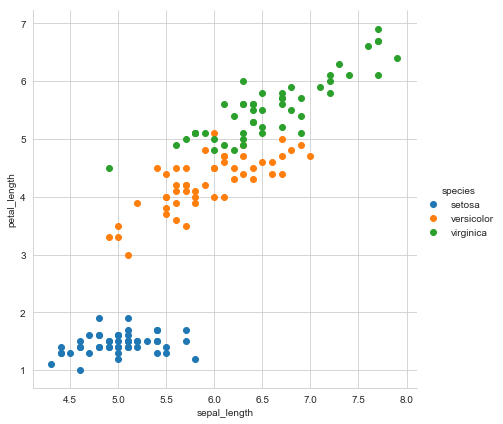

In [47]:
import seaborn as sns
 
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species", height = 6).map(plt.scatter, 'sepal_length','petal_length').add_legend()

In [19]:
indices = np.random.permutation(data.shape[0])
div = int(0.75 * len(indices))
development_id, test_id = indices[:div], indices[div:]

development_set, test_set = data.loc[development_id,:], data.loc[test_id,:]
print("Development Set:\n", development_set.head(), "\n\nTest Set:\n", test_set.head())

Development Set:
     sepal_length  sepal_width  petal_length  petal_width            class
71           6.1          2.8           4.0          1.3  Iris-versicolor
10           5.4          3.7           1.5          0.2      Iris-setosa
31           5.4          3.4           1.5          0.4      Iris-setosa
41           4.5          2.3           1.3          0.3      Iris-setosa
20           5.4          3.4           1.7          0.2      Iris-setosa 

Test Set:
      sepal_length  sepal_width  petal_length  petal_width            class
131           7.9          3.8           6.4          2.0   Iris-virginica
112           6.8          3.0           5.5          2.1   Iris-virginica
124           6.7          3.3           5.7          2.1   Iris-virginica
61            5.9          3.0           4.2          1.5  Iris-versicolor
60            5.0          2.0           3.5          1.0  Iris-versicolor


In [20]:
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

In [22]:
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1])

In [36]:
col = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [45]:
def euclideanDistance(data1, data2, cols = col):
    
    # Get two data points
    point_1 = list(data1[col])
    point_2 = list(data2[col])
    
    # variable to store sum of squares
    sum_of_squares = 0
    
    # Loop for sum of squares
    for i in range(len(point_2)):
        sum_of_squares += (point_1[i] - point_2[i])**2
        
    return round(sum_of_squares ** 0.5, 3)

In [46]:
euclideanDistance(data.loc[0], data.loc[1])

0.539

In [50]:
data.shape[0]

150

In [108]:
def get_k_neighbours(data_1, data, k=50):
    
    # variable to maintain the k-neighbours
    k_neighbours = []
    # list of euclidean distances
    all_dists = []
    
    # loop to calculate distances from all points
    for i in range(data.shape[0]):
        data_2 = data.loc[i]
        all_dists.append({'dist': euclideanDistance(data_1, data_2), 'index': i, 'class': data_2['class']})
    
    # the sorted list in order of euclidean distances
    newlist = sorted(all_dists, key=operator.itemgetter('dist')) 
    # We select the k closest\
    k_neighbours = newlist[:k]
    return k_neighbours
    

In [109]:
def select_class(k_neighbours: list, classes = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']):
    count_dict = {'Iris-virginica': 0, 'Iris-versicolor': 0, 'Iris-setosa': 0}
    for i in k_neighbours:
        count_dict[i['class']] += 1
    result_class = ''
    max_class = 0
    for iris_class in classes:
        if int(max_class) < int(count_dict[iris_class]):
            max_class = count_dict[iris_class]
            result_class = iris_class
    print(result_class)

In [110]:
select_class(k_n)

Iris-setosa


In [111]:
def KNN(data):
    num_correct = 0
    for i in range(data.shape[0]):
        trunc_df = data.drop(i)
        print(data.loc[i])
        k_n = get_k_neighbours(data.loc[i], trunc_df)
        if select_class == data.loc[i]['class']:
            num_correct += 1
    print(f"Number of correct guess: {num_correct}")

In [113]:
K_N = get_k_neighbours(data.loc[1], data)

In [114]:
select_class(K_N)

Iris-setosa
